Matplotlib is building the font cache; this may take a moment.


=== HEART DISEASE DATA CLEANING PIPELINE ===

Loading heart disease dataset...
Dataset loaded successfully!
Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

=== MISSING VALUES ANALYSIS ===
Missing values summary:
   Column  Missing_Count  Missing_Percentage
11     ca              4            1.320132
12   thal              2            0.660066

NaN values: 6
Infinite values: 0

Checking for potential missing value representations:


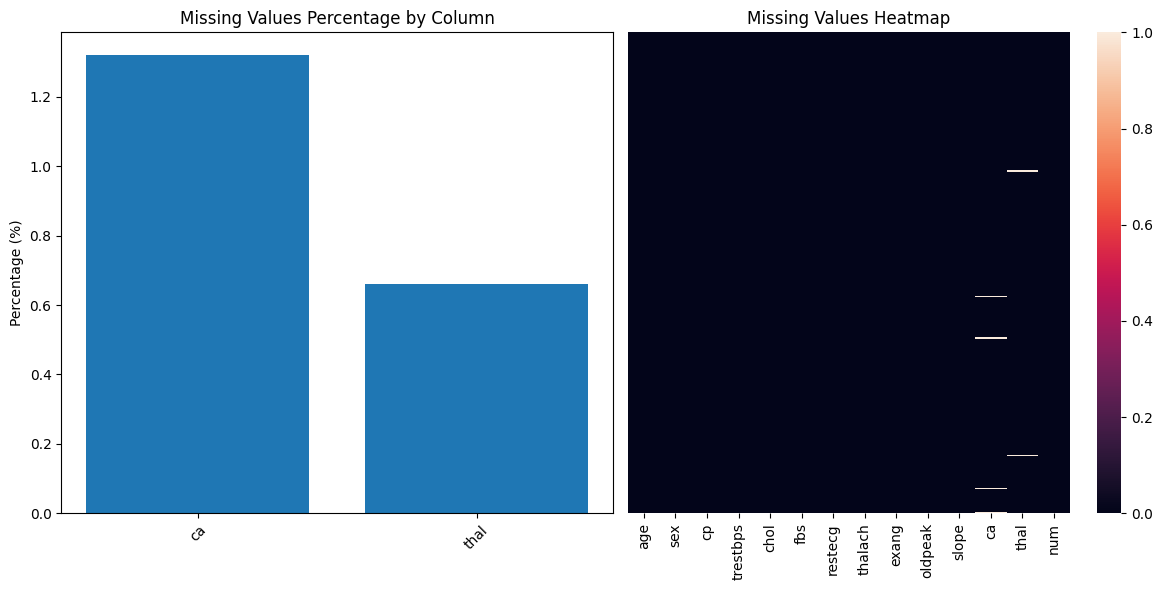


=== DATA QUALITY CHECKS ===
Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

Value ranges for numerical columns:
age: 29 to 77
sex: 0 to 1
cp: 1 to 4
trestbps: 94 to 200
chol: 126 to 564
fbs: 0 to 1
restecg: 0 to 2
thalach: 71 to 202
exang: 0 to 1
oldpeak: 0.0 to 6.2
slope: 1 to 3
ca: 0.0 to 3.0
thal: 3.0 to 7.0
num: 0 to 4

Unique values in categorical columns:
sex: [np.int64(0), np.int64(1)]
cp: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
fbs: [np.int64(0), np.int64(1)]
restecg: [np.int64(0), np.int64(1), np.int64(2)]
exang: [np.int64(0), np.int64(1)]
slope: [np.int64(1), np.int64(2), np.int64(3)]
num: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

=== HANDLING MISSING VALUES ===
Removing rows with mi

In [1]:
# Data Cleaning Script for Heart Disease Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

def load_data():
    """Load the heart disease dataset from UCI ML Repository"""
    print("Loading heart disease dataset...")
    heart_disease = fetch_ucirepo(id=45)
    
    # Get features and targets
    X = heart_disease.data.features
    y = heart_disease.data.targets
    
    # Combine into one dataframe
    df = pd.concat([X, y], axis=1)
    
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    return df, heart_disease

def analyze_missing_values(df):
    """Analyze missing values in the dataset"""
    print("\n=== MISSING VALUES ANALYSIS ===")
    
    # Check for different types of missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    missing_summary = pd.DataFrame({
        'Column': missing_values.index,
        'Missing_Count': missing_values.values,
        'Missing_Percentage': missing_percentage.values
    })
    
    print("Missing values summary:")
    print(missing_summary[missing_summary['Missing_Count'] > 0])
    
    # Check for other types of missing values
    print(f"\nNaN values: {df.isna().sum().sum()}")
    print(f"Infinite values: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")
    
    # Check for potential missing value representations
    print("\nChecking for potential missing value representations:")
    for col in df.columns:
        unique_vals = sorted(df[col].unique())
        if -1 in unique_vals or 999 in unique_vals:
            print(f"{col}: {unique_vals}")
    
    return missing_summary

def visualize_missing_values(df, missing_summary):
    """Visualize missing values if they exist"""
    if missing_summary['Missing_Count'].sum() > 0:
        plt.figure(figsize=(12, 6))
        
        # Bar plot of missing values
        plt.subplot(1, 2, 1)
        missing_summary_filtered = missing_summary[missing_summary['Missing_Count'] > 0]
        plt.bar(missing_summary_filtered['Column'], missing_summary_filtered['Missing_Percentage'])
        plt.title('Missing Values Percentage by Column')
        plt.xticks(rotation=45)
        plt.ylabel('Percentage (%)')
        
        # Heatmap of missing values
        plt.subplot(1, 2, 2)
        sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
        plt.title('Missing Values Heatmap')
        
        plt.tight_layout()
        plt.show()

def data_quality_checks(df):
    """Perform data quality checks"""
    print("\n=== DATA QUALITY CHECKS ===")
    
    print("Data types:")
    print(df.dtypes)
    
    print("\nValue ranges for numerical columns:")
    for col in df.select_dtypes(include=[np.number]).columns:
        print(f"{col}: {df[col].min()} to {df[col].max()}")
    
    print("\nUnique values in categorical columns:")
    for col in df.select_dtypes(include=['object', 'int64']).columns:
        if df[col].nunique() < 20:
            print(f"{col}: {sorted(df[col].unique())}")

def clean_missing_values(df, missing_summary):
    """Handle missing values in the dataset"""
    print("\n=== HANDLING MISSING VALUES ===")
    
    df_clean = df.copy()
    
    # Strategy 1: Remove rows with missing values (if percentage is low)
    low_missing_cols = missing_summary[missing_summary['Missing_Percentage'] < 5]['Column'].tolist()
    if low_missing_cols:
        print(f"Removing rows with missing values in columns: {low_missing_cols}")
        df_clean = df_clean.dropna(subset=low_missing_cols)
        print(f"Rows after removal: {len(df_clean)}")
    
    # Strategy 2: Impute missing values for columns with higher missing percentages
    high_missing_cols = missing_summary[missing_summary['Missing_Percentage'] >= 5]['Column'].tolist()
    
    for col in high_missing_cols:
        if col in df_clean.columns:
            if df_clean[col].dtype in ['int64', 'float64']:
                # For numerical columns, use median
                median_val = df_clean[col].median()
                df_clean[col].fillna(median_val, inplace=True)
                print(f"Imputed {col} with median: {median_val}")
            else:
                # For categorical columns, use mode
                mode_val = df_clean[col].mode()[0]
                df_clean[col].fillna(mode_val, inplace=True)
                print(f"Imputed {col} with mode: {mode_val}")
    
    return df_clean

def validate_data(df_clean):
    """Validate the cleaned data"""
    print("\n=== DATA VALIDATION ===")
    
    # Age validation
    if 'age' in df_clean.columns:
        invalid_age = df_clean[(df_clean['age'] < 0) | (df_clean['age'] > 120)]
        print(f"Invalid age values: {len(invalid_age)}")
    
    # Medical value validations
    if 'trestbps' in df_clean.columns:
        invalid_bp = df_clean[(df_clean['trestbps'] < 50) | (df_clean['trestbps'] > 300)]
        print(f"Invalid blood pressure values: {len(invalid_bp)}")
    
    if 'chol' in df_clean.columns:
        invalid_chol = df_clean[(df_clean['chol'] < 50) | (df_clean['chol'] > 600)]
        print(f"Invalid cholesterol values: {len(invalid_chol)}")
    
    # Check for outliers using IQR method
    print("\nChecking for outliers using IQR method:")
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        if len(outliers) > 0:
            print(f"{col}: {len(outliers)} outliers detected")

def main():
    """Main function to run the data cleaning pipeline"""
    print("=== HEART DISEASE DATA CLEANING PIPELINE ===\n")
    
    # Step 1: Load data
    df, metadata = load_data()
    
    # Step 2: Analyze missing values
    missing_summary = analyze_missing_values(df)
    
    # Step 3: Visualize missing values
    visualize_missing_values(df, missing_summary)
    
    # Step 4: Data quality checks
    data_quality_checks(df)
    
    # Step 5: Clean missing values
    df_clean = clean_missing_values(df, missing_summary)
    
    # Step 6: Validate cleaned data
    validate_data(df_clean)
    
    # Step 7: Final summary
    print("\n=== FINAL DATASET SUMMARY ===")
    print(f"Original shape: {df.shape}")
    print(f"Final shape: {df_clean.shape}")
    print(f"Rows removed: {len(df) - len(df_clean)}")
    print(f"Percentage of data retained: {(len(df_clean)/len(df)*100):.2f}%")
    print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")
    
    # Step 8: Save cleaned dataset
    df_clean.to_csv("../data/heart_cleaned.csv", index=False)
    print("\nCleaned dataset saved to '../data/heart_cleaned.csv'")
    
    # Step 9: Display sample of cleaned data
    print("\nFirst few rows of cleaned data:")
    print(df_clean.head())
    
    return df_clean

if __name__ == "__main__":
    df_cleaned = main()